<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/08_2_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%run my_init.py

Mounted at /content/drive
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [6]:
%matplotlib inline

#패션 MNIST 데이터 불러오기

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_scaled = X_train.reshape(-1,28,28,1)/255.0 #데이터 2D->3D 가 48000개 인 것(그림 잘 이해하기!!!)
X_train_scaled, val_scaled, y_train, val_target = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


#합성곱 신경망 만들기

In [11]:
model = keras.Sequential()
# 첫번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1))) #입력층 크기, 커널 정보만 설정
model.add(keras.layers.MaxPooling2D(2))

# 이미지 - 일반적인 도형적인 특성에 대한 필터링 진행(선, 면, 등등) -> general
# 아래로 내려갈수록 special , detail 특성 필터링

In [12]:
##두번째 합성곱-풀링 층
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [13]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

# conv2d_2 : (28,28,1)->32개 이므로 3차원은 표현하지 않음

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

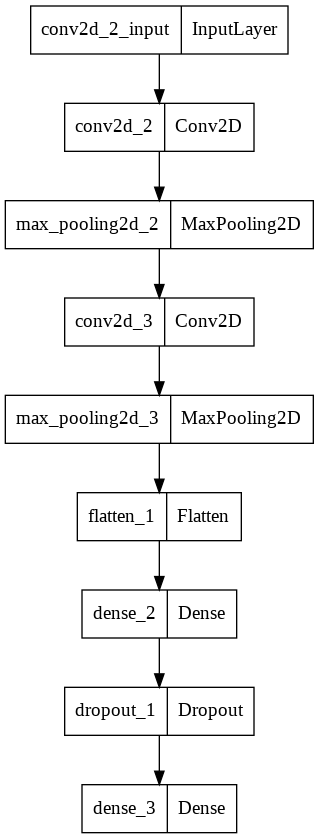

In [15]:
keras.utils.plot_model(model)

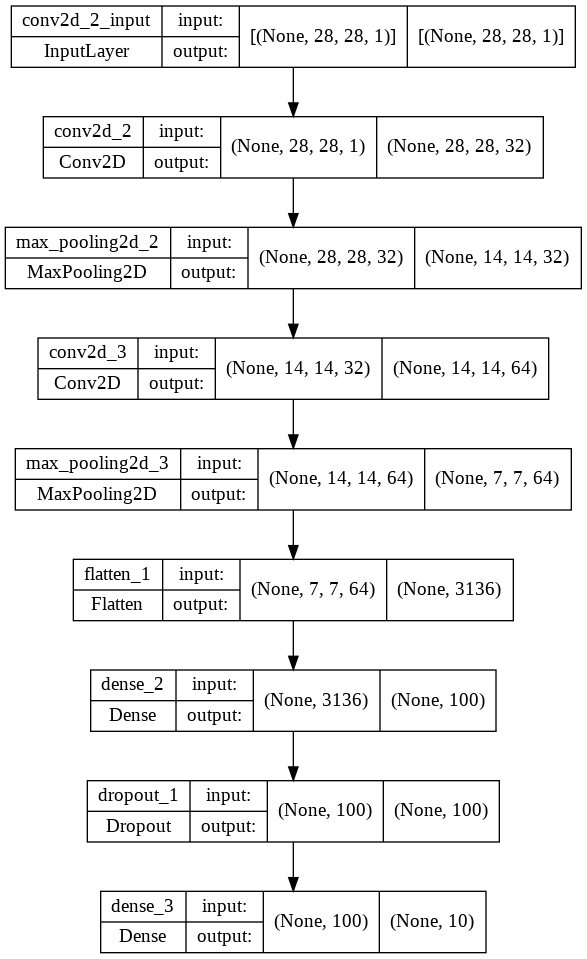

In [16]:
keras.utils.plot_model(model, show_shapes=True)

#모델 컴파일과 훈련